In [10]:
#importing library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [18]:
df=pd.read_csv('hotel_booking.csv')

In [15]:
df.shape

(119390, 36)

In [20]:
# viewing columns 
pd.set_option('display.max_columns', None)
print(round(df.isnull().sum()/df.shape[0] * 100))

hotel                              0.0
is_canceled                        0.0
lead_time                          0.0
arrival_date_year                  0.0
arrival_date_month                 0.0
arrival_date_week_number           0.0
arrival_date_day_of_month          0.0
stays_in_weekend_nights            0.0
stays_in_week_nights               0.0
adults                             0.0
children                           0.0
babies                             0.0
meal                               0.0
country                            0.0
market_segment                     0.0
distribution_channel               0.0
is_repeated_guest                  0.0
previous_cancellations             0.0
previous_bookings_not_canceled     0.0
reserved_room_type                 0.0
assigned_room_type                 0.0
booking_changes                    0.0
deposit_type                       0.0
agent                             14.0
company                           94.0
days_in_waiting_list     

In [6]:
#null values in childern and country is very less compared to number of available records , so that row can be dropped.
#agent and company is large number to tackel and that will not affect the cancellation  so that column can be dropped.
df.drop(['company','agent'],axis=1,inplace=True) 
df.dropna(inplace=True)

In [7]:
# None -required columns 
df.drop(['name','email','phone-number','credit_card'],axis=1,inplace=True) 

In [8]:
#changing data type of date from object to datetime
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64     

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [10]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745


In [11]:
# remobing outliers
df=df[df['adr']<5000]
df=df[df['adr']>0]

In [22]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


is_canceled
0    0.624233
1    0.375767
Name: proportion, dtype: float64


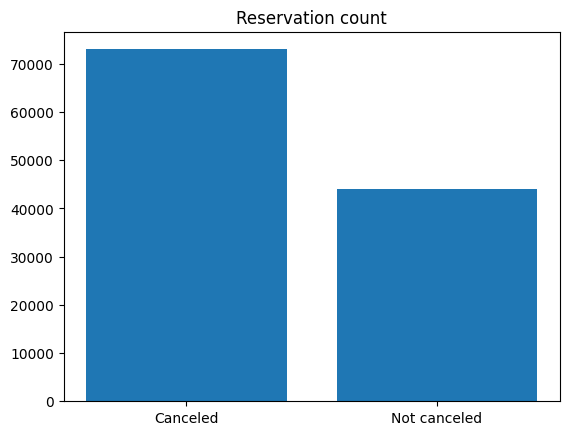

In [13]:
#analysis and visualization part
cancelled=df['is_canceled'].value_counts(normalize=True)# value_counts shorts the o/p in descending order!!
print(cancelled)
plt.bar(['Canceled','Not canceled'],df['is_canceled'].value_counts())
plt.title('Reservation count')
plt.show()

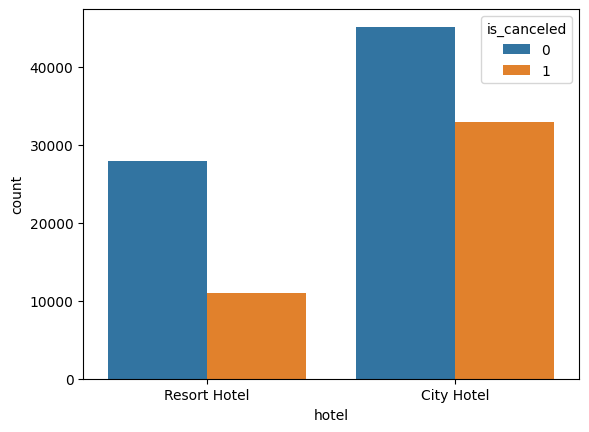

In [14]:
c_p=sns.countplot(x='hotel',hue='is_canceled',data=df) 

In [15]:
# as we can see cancellations are more in city hotel and now we will check the cancellation rate based on hotel_name.
#creating filters :
resort_hotel=df[df['hotel']=='Resort Hotel']
cancelled_res_hotel=resort_hotel['is_canceled'].value_counts(normalize=True)
city_hotel=df[df['hotel']!='Resort Hotel']
cancelled_city_hotel=city_hotel['is_canceled'].value_counts(normalize=True)
print('Resort hotel')
print(cancelled_res_hotel)
print(40*'-')
print('City hotel')
print(cancelled_city_hotel)

Resort hotel
is_canceled
0    0.717039
1    0.282961
Name: proportion, dtype: float64
----------------------------------------
City hotel
is_canceled
0    0.578059
1    0.421941
Name: proportion, dtype: float64


In [16]:
# conclusion : in resort hotel cancellation rate is 28% while in city hotel it is 42%!!
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

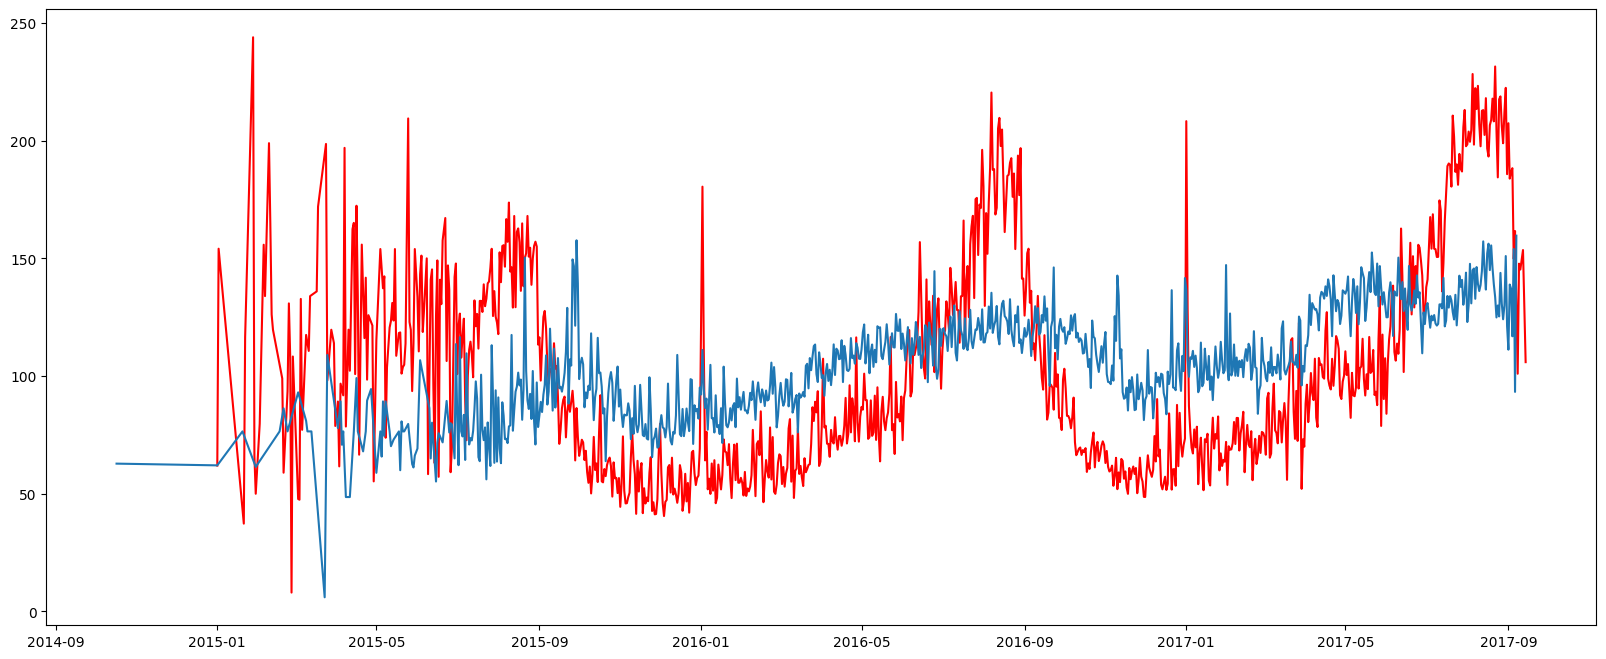

In [17]:
# resort_hotel.head()
# print(resort_hotel.to_string)
plt.figure(figsize=(20,8))
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort hotel',color='red')
plt.plot(city_hotel.index,city_hotel['adr'],label='City hotel')
plt.show()

<Axes: xlabel='month', ylabel='count'>

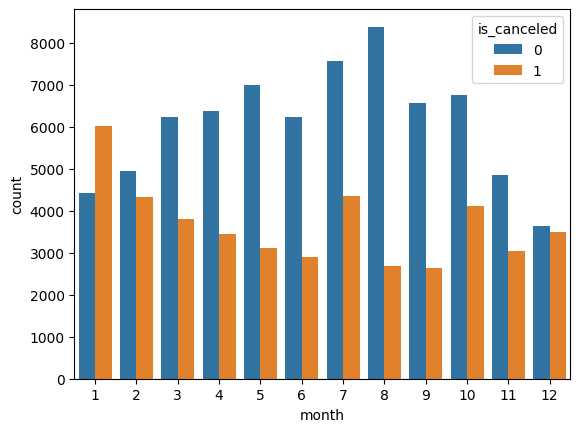

In [18]:
# from this we can say that adr for city hotel is more than resort hotel.
# now we will check the month wise price and month wise cancellation.
df['month']=df['reservation_status_date'].dt.month
sns.countplot(x='month',hue='is_canceled',data=df)

In [19]:
# august is having minimum cancellation rate while for jan it is maximum.

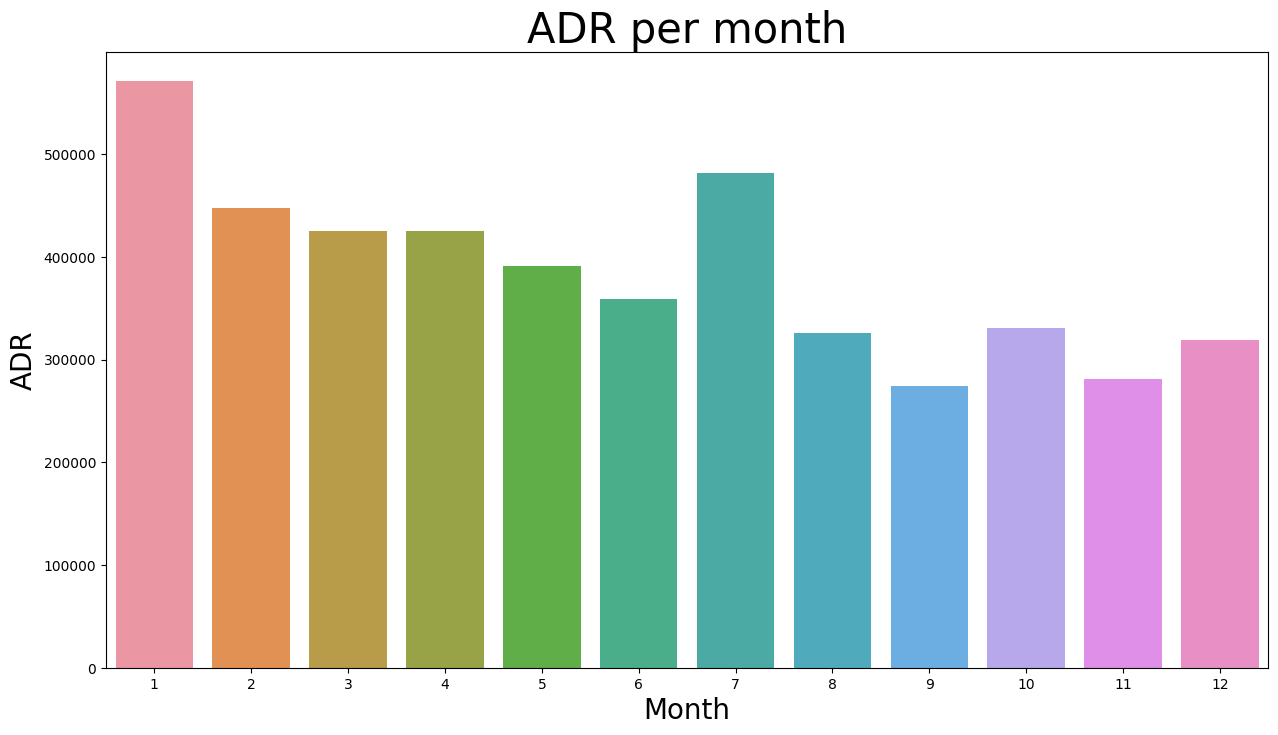

In [20]:
plt.figure(figsize=(15, 8))
plt.title('ADR per month', fontsize=30)
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.xlabel('Month', fontsize=20)
plt.ylabel('ADR', fontsize=20)
plt.show()


country
PRT    27327
GBR     2451
ESP     2176
FRA     1932
ITA     1332
DEU     1218
IRL      832
BRA      829
USA      500
BEL      472
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x1b982868580>,
 [Text(-0.6450385367184535, 0.8910248515883924, 'PRT'),
  Text(-0.13222577601739, -1.092023966841662, 'GBR'),
  Text(0.27381400740966766, -1.0653759380360805, 'ESP'),
  Text(0.6045705741899774, -0.9189637755774713, 'FRA'),
  Text(0.8223005314822002, -0.7306311216503794, 'ITA'),
  Text(0.953841740453227, -0.5478922651116356, 'DEU'),
  Text(1.0308194496228542, -0.3839417433403619, 'IRL'),
  Text(1.0727668362436045, -0.24325154687254832, 'BRA'),
  Text(1.0925929451360723, -0.1274388333236148, 'USA'),
  Text(1.0992078019902034, -0.04173976573803357, 'BEL')],
 [Text(-0.3518392018464291, 0.4860135554118503, '69.95'),
  Text(-0.07212315055494, -0.5956494364590883, '6.27'),
  Text(0.1493530949507278, -0.5811141480196803, '5.57'),
  Text(0.32976576773998767, -0.5012529684968025, '4.95'),
  Text(0.4485275626266546, -0.39852606635475235, '3.41'),
  Text(0.5202773129744874, -0.29885032642452847, '3.12'),
  Text(0.5622651543397386, -0.20942276909474286

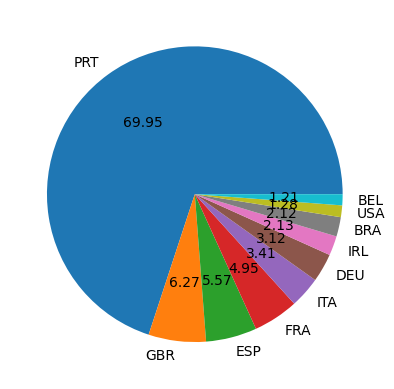

In [21]:
cancelled_data=df[df['is_canceled']==1]
#checking cancellation in top 10 countries
top_10_countries=cancelled_data['country'].value_counts()[0:10]
print(top_10_countries)
plt.pie(top_10_countries,labels=top_10_countries.index,autopct='%.2f')

In [22]:
# conclusions : services quality should be increased in PRT coutry.
#now we will check the market segment catogories percentage thorugh which booking is done.
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.479112
Offline TA/TO    0.203740
Groups           0.167188
Direct           0.104396
Corporate        0.043050
Aviation         0.001975
Complementary    0.000539
Name: proportion, dtype: float64

In [23]:
# as we can see 47% of the resevations are done by online agents.
#now we will check this for cancelled_data
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.471410
Groups           0.274705
Offline TA/TO    0.187467
Direct           0.042982
Corporate        0.022162
Aviation         0.001160
Complementary    0.000114
Name: proportion, dtype: float64

In [24]:
#47% of the cancellations includes the reservations via online agents.
#reason could be wrong info and photos provided via online agents and websites.
non_cancelled_data=df[df['is_canceled']!=1]

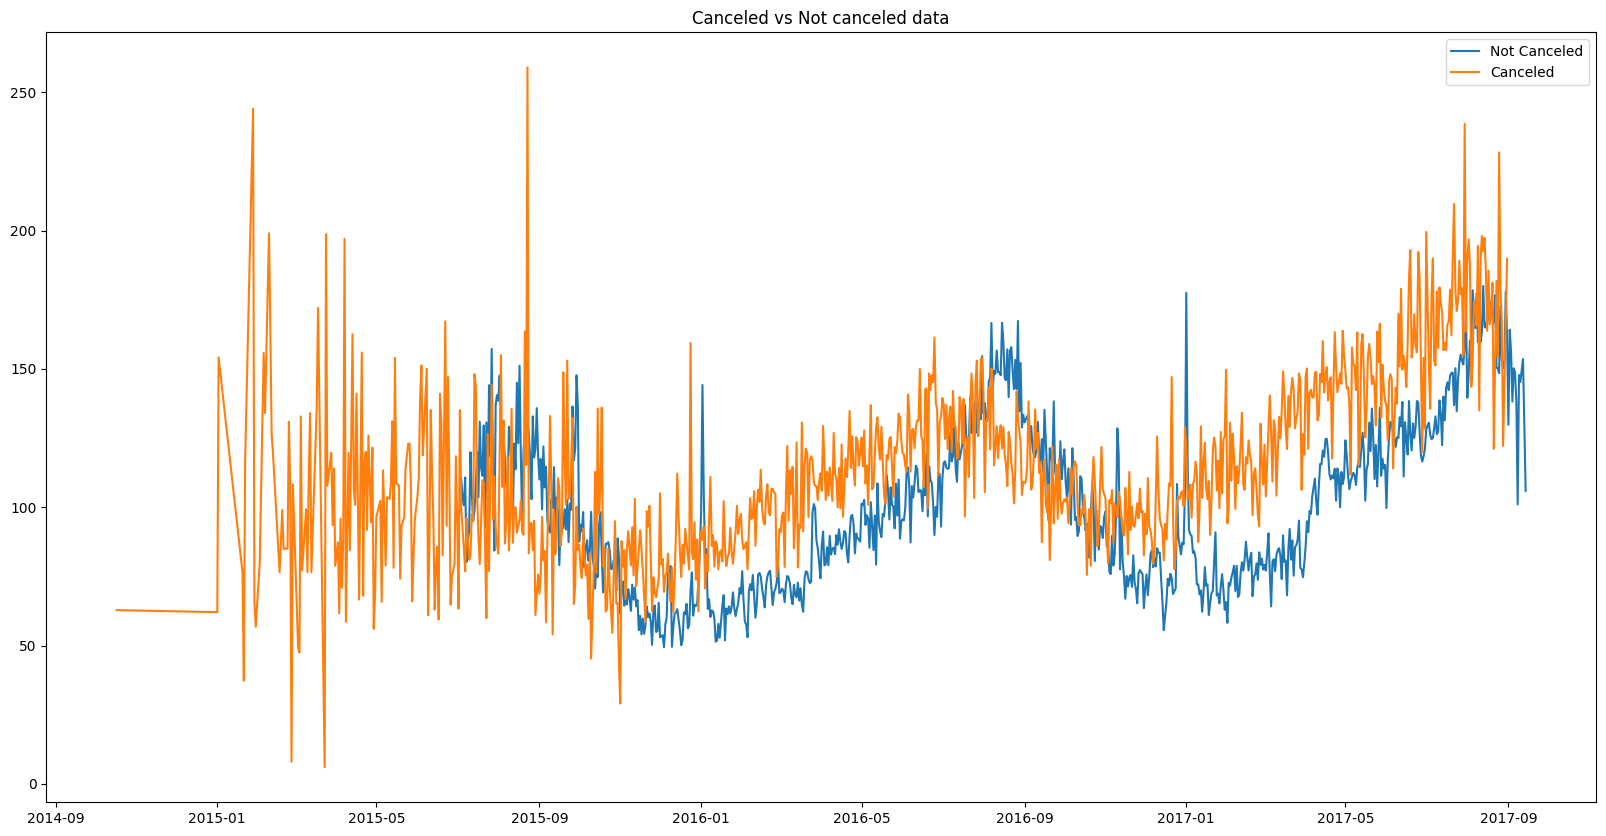

In [25]:
non_cancelled_data_adr=non_cancelled_data.groupby('reservation_status_date')[['adr']].mean().reset_index()
cancelled_data_adr=cancelled_data.groupby('reservation_status_date')[['adr']].mean().reset_index()
plt.figure(figsize=(20,10))
plt.plot(non_cancelled_data_adr['reservation_status_date'],non_cancelled_data_adr['adr'],label='Not Canceled')

plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'],label='Canceled')
plt.title('Canceled vs Not canceled data')
plt.legend()
plt.show()


In [26]:
# as we can see b/w 2016-1  and 2017-9 adr of cancelled reservation is high.
non_canceled_df_adr=non_cancelled_data_adr[(non_cancelled_data_adr['reservation_status_date']>'2016') &  (non_cancelled_data_adr['reservation_status_date']<'2017-09')]
canceled_df_adr=cancelled_data_adr[(cancelled_data_adr['reservation_status_date']>'2016') &  (cancelled_data_adr['reservation_status_date']<'2017-09')]



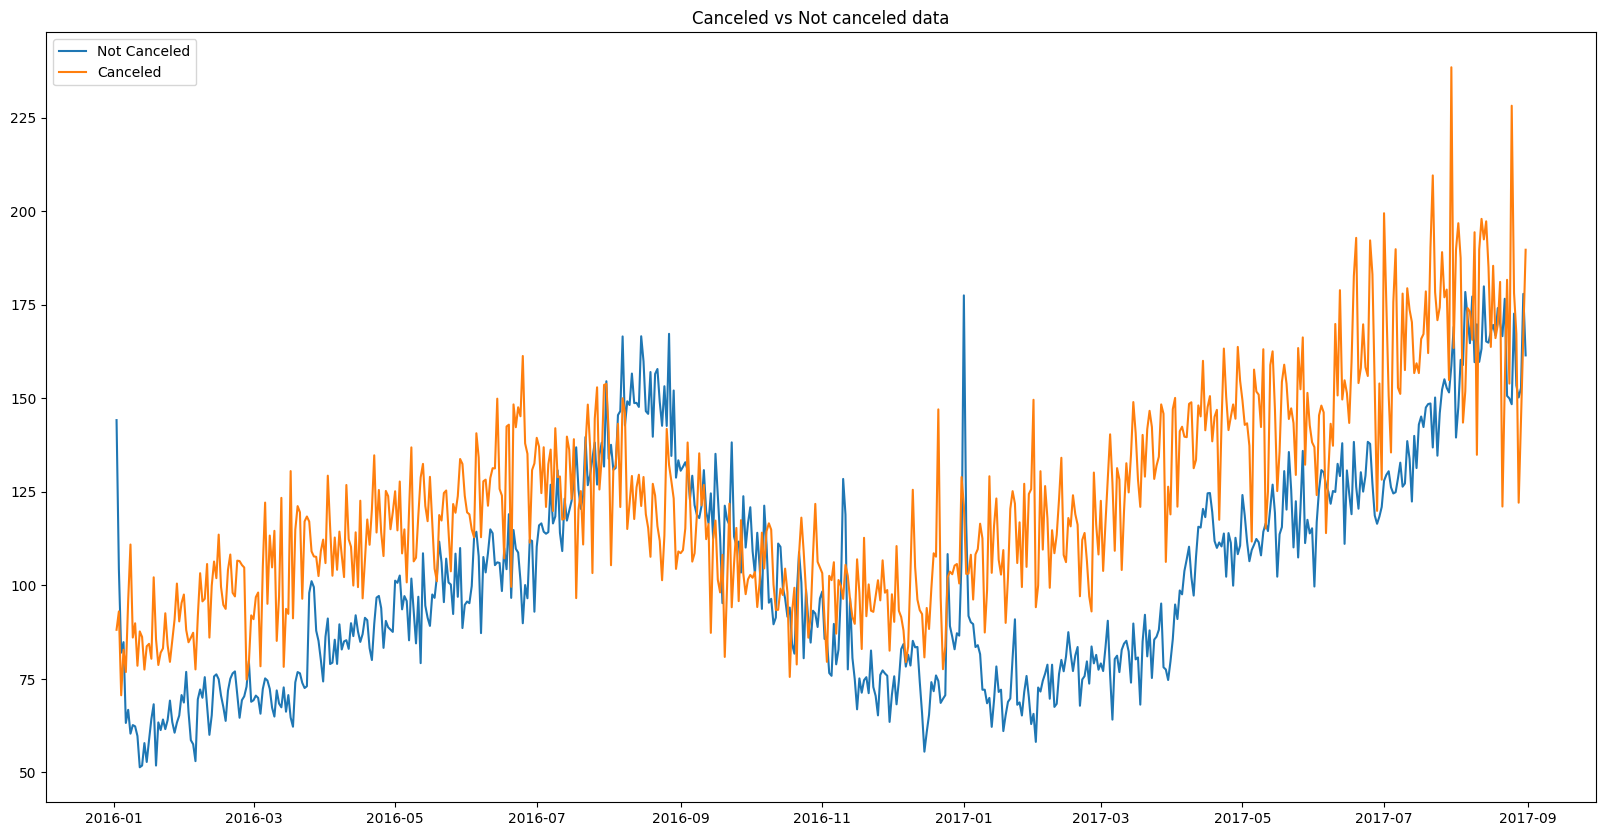

In [27]:
plt.figure(figsize=(20,10))
plt.plot(non_canceled_df_adr['reservation_status_date'],non_canceled_df_adr['adr'],label='Not Canceled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'],label='Canceled')
plt.title('Canceled vs Not canceled data')
plt.legend()
plt.show()


In [ ]:
d_new=pd.DataFrame(df)
d_new.to_csv('cleaned_data.csv')